<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
        <h1>NUMERIEK BEPALEN VAN DE OPPERVLAKTE TUSSEN EEN KROMME EN DE X-AS</h1>
        <h2>De Riemannsom</h2>
    </font>
</div>

<div class="alert alert-box alert-success"> 
In deze notebook leer je hoe je de oppervlakte tussen een kromme en de x-as numeriek kan benaderen met enkele rechthoeken.
</div>

### Nodige modules importeren

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div>
    <font color=#690027 markdown="1">
        <h2>1. Inleiding</h2> 
    </font>
</div>

De cirkel met middelpunt O(0,0) en straal 5 heeft als vergelijking:
$$ x^2 + y^2 = 25 $$
Beschouw nu enkel de bovenste helft van deze cirkel. <br>
Deze kromme heeft als vergelijking:
$$ y = \displaystyle{\sqrt{25-x^2}}$$

In Python kan je een functievoorschrift ingeven m.b.v. het sleutelwoord `lambda`, op de manier die je ziet in de volgende code-cellen.

In [2]:
# funtie die geïntegreerd moet worden
f = lambda x: np.sqrt(25 - x ** 2)            # f is functie met domein [-5, 5] en nulwaarden -5 en 5

Voer de volgende code-cel uit om de grafiek van f te tonen.

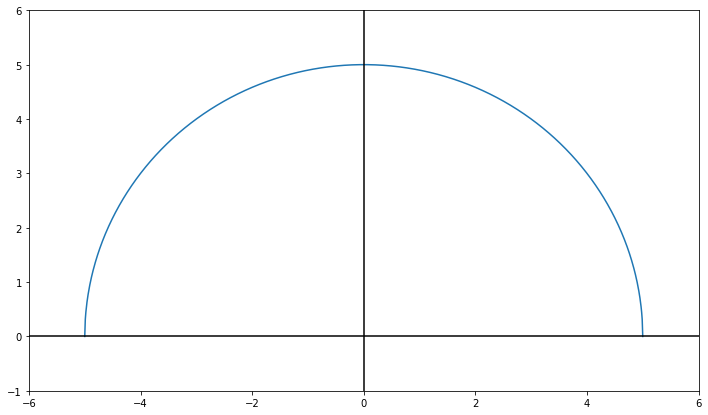

In [3]:
# grafiek

x = np.arange(-5, 5.01 , 0.01)          # NumPy-lijst van originelen aanmaken 
y = f(x)                            # NumPy-lijst van overeenkomstige beelden aanmaken   

plt.figure(figsize=(12, 7))

plt.axis(xmin=-6, xmax=6, ymin=-1, ymax=6)

plt.plot(x, y)

plt.vlines(0, -1, 6, color="black")  # y-as
plt.hlines(0, -6, 6, color="black")  # x-as

plt.show()

### Opdracht 1.1 
Met de formule voor de oppervlakte van een cirkel bereken je dat de oppervlakte van deze halve cirkel 39,269 ... bedraagt. Reken dit na.

In [4]:
# voorbeeldcode
np.pi * 5**2 / 2

39.269908169872416

<div>
    <font color=#690027 markdown="1">
        <h2>2. Riemannsom</h2> 
    </font>
</div>

### Voorbeeld
Zoek de oppervlakte tussen de kromme en de x-as over het interval [-5, 5], m.a.w. de oppervlakte van een halve cirkel.

Je zal deze oppervlakte benaderen door een aantal rechthoeken. 

De oppervlakte van een rechthoek wordt gegeven door de formule:
$$ \text{lengte} . \text{breedte}$$

Stel dat je werkt over een interval [a, b]. De rechthoeken worden bepaald door de intervallen die men bekomt door [a, b] te verdelen in n delen. De breedte van een rechthoek komt overeen met de breedte van het interval, en is dus gelijk aan $\frac{b-a}{n}$.<br> 
Voor een rechthoek op [a,b] bijvoorbeeld $[x_{0},x_{1}]$  is de lengte dan $f(x_{0})$.

Voor de halve cirkel betekent dit dat als je 
- maar 1 rechthoek neemt, deze rechthoek breedte 10 en lengte 0 heeft.<br>De berekende oppervlakte is dan 0. 
- 2 rechthoeken neemt, de eerste rechthoek breedte 5 en lengte 0 heeft en de tweede rechthoek breedte 5 en lengte 5 heeft.<br> De berekende oppervlakte is dan 25.
- 4 rechthoeken neemt, deze alle breedte 2,5 hebben. De eerste heeft lengte 0, de tweede en de vierde hebben lengte 4,330... (nl. $\sqrt{18,75}$), en de derde heeft lengte 5.<br> De berekende oppervlakte is dan $0 + 4, 330... \cdot. 2.5 + 5 \cdot 2.5 +  4, 330... . 2.5$ = 34,1506 ...

Je merkt dat de berekende oppervlakte de werkelijke oppervlakte beter benadert naarmate er meer rechthoeken zijn. 

Je zal daarvoor een functie definiëren met als parameters de betreffende functie, het interval dat de grens van de oppervlakte bepaalt en het gewenste aantal rechthoeken. 

In [5]:
# formule oppervlakte rechthoek bepaald door x-as en twee punten op grafiek van f
def oppervlakte_rechthoek(f, h, a):
    """Berekent oppervlakte van rechthoek met hoekpunten (a, 0), (a, f(a)), (a + h, 0), (a + h, f(a))."""
    oppervlakte = f(a) * h    
    return oppervlakte

# definieer functie om oppervlakte tussen grafiek van f en x-as te benaderen over [a, b] a.d.h.v. n rechthoeken
def riemann(f, n, a, b):
    """Benadert de oppervlakte tussen de kromme bepaald door de functie f en de x-as over [a, b]."""
    h = (b-a)/n
    integraal = 0
    for i in range(1, n):
        integraal = integraal + oppervlakte_rechthoek(f, h , a + i * h)
    return integraal

Voer de volgende code-cellen uit om de oppervlakte van de halve cirkel te benaderen door 1 rechthoek en door 2 rechthoeken.

In [6]:
# pas Riemannsom toe met 1 rechthoek
print(riemann(f, 1, -5, 5))

0


In [7]:
# pas Riemannsom toe met 2 rechthoeken
print(riemann(f, 2, -5, 5))

25.0


### Opdracht 2.1
Pas deze functie toe om de oppervlakte van de halve cirkel te benaderen met 4 rechthoeken.

In [8]:
# voorbeeldcode
# pas Riemannsom toe met 4 rechthoeken
print(riemann(f, 4, -5, 5))

34.15063509461097


### Opdracht 2.2
- Ga na dat het resultaat nauwkeuriger wordt, wanneer je meer rechthoeken gebruikt.<br>
- Bepaal een rij die de benadering weergeeft naargelang het aantal gebruikte rechthoeken en illustreer de benadering a.d.h.v. de limiet van de rij.

In [9]:
# voorbeeldcode
aantal_rechthoeken = np.arange(1, 10000, 100)
print(aantal_rechthoeken)

oppervlaktes = []
for aantal in aantal_rechthoeken:
    # pas Riemannsom toe met aantal 
    opp = riemann(f, aantal, -5, 5)
    oppervlaktes.append(opp)
print(oppervlaktes)

[   1  101  201  301  401  501  601  701  801  901 1001 1101 1201 1301
 1401 1501 1601 1701 1801 1901 2001 2101 2201 2301 2401 2501 2601 2701
 2801 2901 3001 3101 3201 3301 3401 3501 3601 3701 3801 3901 4001 4101
 4201 4301 4401 4501 4601 4701 4801 4901 5001 5101 5201 5301 5401 5501
 5601 5701 5801 5901 6001 6101 6201 6301 6401 6501 6601 6701 6801 6901
 7001 7101 7201 7301 7401 7501 7601 7701 7801 7901 8001 8101 8201 8301
 8401 8501 8601 8701 8801 8901 9001 9101 9201 9301 9401 9501 9601 9701
 9801 9901]
[0, 39.228971716196824, 39.255322404709446, 39.261948087893124, 39.26473123414622, 39.26620097009287, 39.26708654216856, 39.267668207569834, 39.2680742780981, 39.26837093942316, 39.26859543204516, 39.268770148147645, 39.26890927672654, 39.26902219928779, 39.2691153409127, 39.26919323425188, 39.26925915883337, 39.269315539932116, 39.269364205621656, 39.26940655716471, 39.26944368478815, 39.269476448091545, 39.26950553299412, 39.269531492778086, 39.26955477814286, 39.269575759530326, 39.2

Antwoord: De rij `oppervlaktes` is een monotoon stijgende rij van strikt positieve getallen. 
$$ \lim_{n \to +\infty} u_{n} = 39,269 ... $$.  

<div>
    <font color=#000000 markdown="1">
        <h2>Referentielijst</h2>
    </font>
</div>

https://computation.physics.utoronto.ca/python-reference/learning-examples/numerical-integration/

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook Python voor Numerieke methodes, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière, is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 